# Automated preprocessing with sklearn pipelines

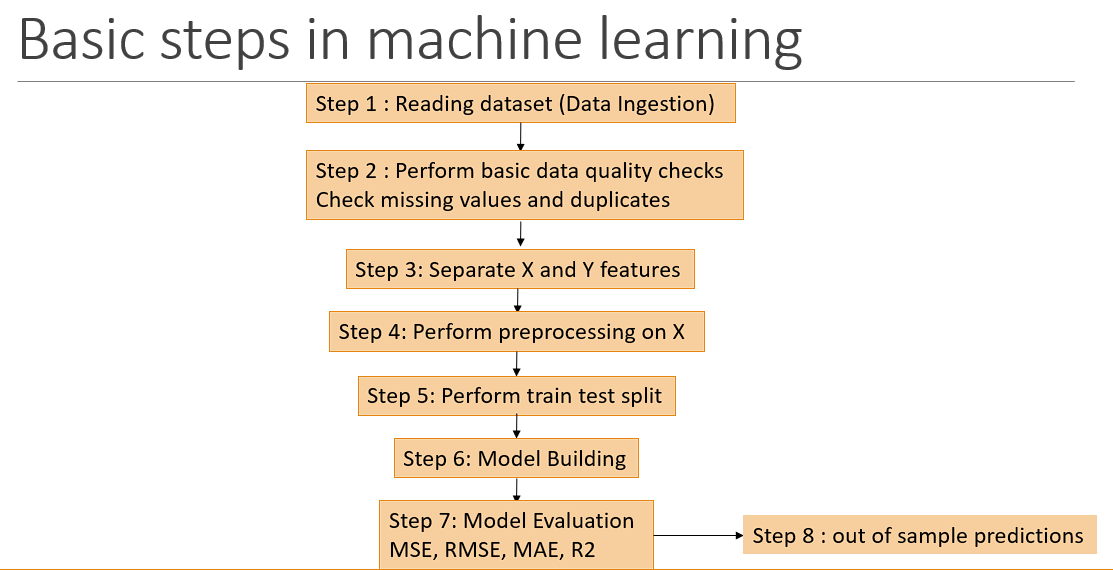

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the cars 93 dataset

In [2]:
import pandas as pd 
df = pd.read_csv('Cars93.csv', na_values=['', 'NA'], keep_default_na=False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


### Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [4]:
m = df.isna().sum()
m

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [5]:
m[m>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [6]:
df.duplicated().sum()

0

### Step 3: Seperate X and Y(Weight)
Drop the id (Serial number features, name of a person) these are statistically insignificant. They do not impact target feature 

In [7]:
X = df.drop(columns=['id', 'Weight'])
Y = df[['Weight']]

In [8]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [9]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


### Step 4: Preprocessing with pipeline

In [10]:
X.dtypes

Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Origin                 object
Make                   object
dtype: object

In [11]:
X.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Origin', 'Make'],
      dtype='object')

In [12]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [13]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [14]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [15]:
from sklearn.pipeline import Pipeline # Automating steps
from sklearn.impute import SimpleImputer # Replacing missing values
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Preprocessing 
from sklearn.compose import ColumnTransformer # Combine cat and con pipeline

In [16]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [17]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore',
                                                 sparse_output=False))])

In [18]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [19]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Min.Price', 'Price', 'Max.Price', 'MPG.city',
                                  'MPG.highway', 'EngineSize', 'Horsepower',
                                  'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
                                  'Passengers', 'Length', 'Wheelbase', 'Width',
                                  'Turn.circle', 'Rear.seat.room',
                                  'Luggage.room']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Manufacturer', 'Model', 'Type', 'AirBags',
                                  'DriveTrain', 'Cylinders', 'Man.trans.avail',
                                  'Origin', 'Make'])])

In [20]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 5: Apply Train Test split

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [22]:
xtrain.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
57,1.365026,1.289670,1.185041,-0.423219,-0.016221,-0.356418,-0.265452,-0.304365,0.187910,-0.663618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,-1.003095,-0.979424,-0.911397,0.113500,0.172352,-0.841022,-0.323043,2.054464,0.157535,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.606307,0.685966,0.729294,-0.781032,-0.959087,0.322027,1.116716,1.212025,-0.247462,0.716035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.043016,-0.021825,-0.063707,-0.423219,-0.204794,0.806631,1.347077,0.875050,-0.713210,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,1.985795,1.726835,1.449374,-0.781032,-0.581941,1.872759,1.270290,-1.146804,-0.996708,1.022624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [24]:
xtest.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
23,-1.003095,-0.854520,-0.701753,0.113500,-0.016221,-0.453339,-0.975733,-0.809828,0.532158,-0.816912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.203957,0.332071,0.428500,-0.781032,-1.336233,-0.259498,-0.111878,-0.472853,0.370159,0.961306,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21,1.422504,1.039862,0.692834,-0.423219,-0.581941,0.612789,0.060893,-0.809828,-1.108083,-0.203734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.100495,-0.073868,-0.209546,-0.959938,-0.581941,2.260442,0.502419,-1.820755,-1.988953,1.942392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


In [26]:
xtrain.shape

(74, 257)

In [27]:
xtest.shape

(19, 257)

### Step 6: Build the model

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

### Step 7: Model evaluation

In [29]:
# R2 score for train
model.score(xtrain, ytrain)

1.0

In [30]:
# R2 score for test
model.score(xtest, ytest)

0.9331364483002006

In [32]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [33]:
ypred_train[0:5]

array([[2920.],
       [2530.],
       [3730.],
       [3490.],
       [4055.]])

In [34]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [35]:
ypred_test[0:5]

array([[2573.41617573],
       [3616.87436046],
       [3040.82463366],
       [3333.01612516],
       [3969.89471087]])

In [37]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                            mean_absolute_percentage_error, r2_score

In [38]:
def evaluate_model(model, x, y):
    # Predict results
    ypred = model.predict(x)
    # Get the metrics
    mse = mean_squared_error(y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print above results
    print(f'Mean Squared Error : {mse:.2f}')
    print(f'Root Mean Squared Error : {rmse:.2f}')
    print(f'Mean Absolute Error : {mae:.2f}')
    print(f'Mean Absolute Percentage Error : {mape:.4f}')
    print(f'R2 Score : {r2:.4f}')

In [39]:
evaluate_model(model, xtrain, ytrain)

Mean Squared Error : 0.00
Root Mean Squared Error : 0.00
Mean Absolute Error : 0.00
Mean Absolute Percentage Error : 0.0000
R2 Score : 1.0000


In [40]:
evaluate_model(model, xtest, ytest)

Mean Squared Error : 24251.21
Root Mean Squared Error : 155.73
Mean Absolute Error : 115.72
Mean Absolute Percentage Error : 0.0365
R2 Score : 0.9331


### R2 score in train and test is more than 0.8 hence it is a good model and can be used for out of sample prediction

### Step 8: Out of Sample prediction

In [41]:
xnew = pd.read_csv('sample.csv', na_values=['', 'NA'], keep_default_na=False)
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [42]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Min.Price', 'Price', 'Max.Price', 'MPG.city',
                                  'MPG.highway', 'EngineSize', 'Horsepower',
                                  'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
                                  'Passengers', 'Length', 'Wheelbase', 'Width',
                                  'Turn.circle', 'Rear.seat.room',
                                  'Luggage.room']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Manufacturer', 'Model', 'Type', 'AirBags',
                                  'DriveTrain', 'Cylinders', 'Man.trans.avail',
                                  'Origin', 'Make'])])

In [43]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,-0.510323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [44]:
preds = model.predict(xnew_pre)
preds

array([[3334.22246823],
       [2575.        ],
       [3195.        ],
       [2895.        ],
       [2240.        ]])

In [45]:
xnew['Weight_pred'] = preds

In [46]:
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make,Weight_pred
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,6,190,106,65,37,31.0,17.0,non-USA,Audi 100,3334.222468
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird,2575.000000
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina,3195.000000
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7,2895.000000
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox,2240.000000


### Save above results to csv

In [47]:
xnew.to_csv('results.csv', index=False)

### Top 5 and bottom 5 features impacting the results

In [49]:
co = model.coef_
co

array([[-1.66418291e+00, -4.20310190e-01,  3.46879254e+00,
        -3.48156340e+01, -7.18270730e+01,  6.89919850e+01,
         8.46027367e+01, -2.06156188e+01, -8.32494070e-02,
         3.23976635e+01,  4.22271549e+01,  5.76445360e+01,
         1.59183511e+02,  8.31044117e+01,  3.39408798e+00,
        -2.61968508e+01,  8.88441253e+00, -1.78782767e+01,
         6.76098271e+01,  7.74889505e+01, -4.79051553e+01,
        -4.53480466e+01, -1.65947265e+01,  9.04572272e-02,
         1.89388549e+01,  1.13808629e+01, -3.55985153e+01,
        -8.13747826e+00, -5.13129280e+00,  1.35944477e+01,
        -1.79179603e+01, -1.22910132e+01,  2.51349306e+01,
         3.24121114e+01, -2.55777219e+01, -5.59418459e+01,
         1.07935647e+00, -1.14026388e+00,  3.64590471e+01,
        -2.81870667e+01,  4.35352976e+01,  1.39856563e+01,
        -6.47004853e+01, -5.34275688e+00,  3.48917184e+01,
         5.68123427e-02, -1.76899621e+01,  2.71851508e+01,
        -2.32092831e+00,  2.46492838e-01, -3.54698650e+0

In [53]:
model.coef_.flatten()

array([-1.66418291e+00, -4.20310190e-01,  3.46879254e+00, -3.48156340e+01,
       -7.18270730e+01,  6.89919850e+01,  8.46027367e+01, -2.06156188e+01,
       -8.32494070e-02,  3.23976635e+01,  4.22271549e+01,  5.76445360e+01,
        1.59183511e+02,  8.31044117e+01,  3.39408798e+00, -2.61968508e+01,
        8.88441253e+00, -1.78782767e+01,  6.76098271e+01,  7.74889505e+01,
       -4.79051553e+01, -4.53480466e+01, -1.65947265e+01,  9.04572272e-02,
        1.89388549e+01,  1.13808629e+01, -3.55985153e+01, -8.13747826e+00,
       -5.13129280e+00,  1.35944477e+01, -1.79179603e+01, -1.22910132e+01,
        2.51349306e+01,  3.24121114e+01, -2.55777219e+01, -5.59418459e+01,
        1.07935647e+00, -1.14026388e+00,  3.64590471e+01, -2.81870667e+01,
        4.35352976e+01,  1.39856563e+01, -6.47004853e+01, -5.34275688e+00,
        3.48917184e+01,  5.68123427e-02, -1.76899621e+01,  2.71851508e+01,
       -2.32092831e+00,  2.46492838e-01, -3.54698650e+01, -1.15197273e-01,
       -2.07744697e+01,  

In [50]:
xtrain.columns

Index(['num__Min.Price', 'num__Price', 'num__Max.Price', 'num__MPG.city',
       'num__MPG.highway', 'num__EngineSize', 'num__Horsepower', 'num__RPM',
       'num__Rev.per.mile', 'num__Fuel.tank.capacity',
       ...
       'cat__Make_Toyota Camry', 'cat__Make_Toyota Celica',
       'cat__Make_Toyota Previa', 'cat__Make_Toyota Tercel',
       'cat__Make_Volkswagen Corrado', 'cat__Make_Volkswagen Eurovan',
       'cat__Make_Volkswagen Fox', 'cat__Make_Volkswagen Passat',
       'cat__Make_Volvo 240', 'cat__Make_Volvo 850'],
      dtype='object', length=257)

In [54]:
coef = pd.Series(model.coef_.flatten(), index=xtrain.columns)
coef

num__Min.Price                  -1.664183
num__Price                      -0.420310
num__Max.Price                   3.468793
num__MPG.city                  -34.815634
num__MPG.highway               -71.827073
                                  ...    
cat__Make_Volkswagen Eurovan    72.246419
cat__Make_Volkswagen Fox       -10.226970
cat__Make_Volkswagen Passat     29.893122
cat__Make_Volvo 240              0.000000
cat__Make_Volvo 850             -2.390495
Length: 257, dtype: float64

In [55]:
coef.sort_values(ascending=False)

num__Wheelbase                 159.183511
cat__Make_Nissan Quest          94.867442
cat__Model_Quest                94.867442
cat__Type_Van                   93.879684
cat__Model_Diamante             93.747410
                                  ...    
cat__Type_Large                -72.191150
cat__Model_Maxima              -87.728717
cat__Make_Nissan Maxima        -87.728717
cat__Make_Mitsubishi Mirage    -94.739464
cat__Model_Mirage              -94.739464
Length: 257, dtype: float64